In [1]:
import numpy as np
import pandas as pd

import os

# vizualization
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
from matplotlib import cm
from matplotlib.colors import ListedColormap

# GIS
import fiona
import fiona.crs
import shapely
import rasterio
import geopandas as gpd

In [2]:
years = [2013,2014]
wss = [20]


In [6]:
try:
    dirpath = os.path.dirname(__file__)
except:
    dirpath = os.getcwd()

dir_data = f"{dirpath}/../Data/lidar"
dir_chm = f"{dir_data}/raster"
dir_treetops = f"{dir_data}/vector/treetops"
dir_crowns_r = f"{dir_data}/raster/crowns"
dir_crowns_v = f"{dir_data}/vector/crowns"

ff_index_crowns = f"{dir_crowns_r}/index.txt"
print(os.path.exists(dir_data))


True


In [8]:
year=2013
ws=20
filename=f"{dir_treetops}/{year}/treetops_lmf_ws{ws}.shp"
# with fiona.open(filename,'r',crs=fiona.crs.from_epsg(32650)) as c:
#     print(f"Driver: {c.driver}")
#     print(f"CRS: {c.crs}")
#     print(f"Elements: {len(c)}")
#     print(f"Bounds: {c.bounds}")
#     print(f"Schema: {c.schema}")
#


In [9]:
tt = gpd.read_file(filename)


In [10]:
index_crowns = pd.read_csv(ff_index_crowns, sep=" ", names=["ws", "seed", "cr", "max"], index_col=False)

In [11]:
iWs20 = index_crowns['ws']==20
iSeedCr = index_crowns['seed']<index_crowns['cr']
iValid = iWs20 & iSeedCr
a=np.sum(iWs20)
b=np.sum(iValid)
print(a,b,b/a)

171 117 0.6842105263157895


In [12]:
params = index_crowns[iValid].sample(random_state=232).iloc[0]
f_crowns = f"dalponte_{year}_{ws}_seed{params['seed']:.5f}" \
           f"_cr{params['cr']:.6f}_max{params['max']:.3f}.json" # TODO fix number of figures
ff_crowns = f"{dir_crowns_v}/{year}/{f_crowns}"
print(os.path.exists(ff_crowns))


True


In [13]:
cr = gpd.read_file(ff_crowns)
cr.crs = "EPSG:32650"


In [ ]:
fig,ax = plt.subplots(figsize=10)
cr.plot(ax=ax)
tt.plot(ax=ax,marker='.',markersize=5)

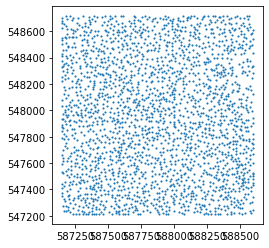

In [30]:
fig,ax = plt.subplots(figsize=10)
cr.plot(ax=ax)
tt.plot(ax=ax,marker='.',markersize=5)

TypeError: from_bounds() argument after * must be an iterable, not int